# Tutorial

## Compare Visualizer

In [1]:
import nnmoduletools
import numpy as np

In [2]:
# make fake reference data
fn2 = np.arange(1*32*3*3).reshape((1, 32, 1, 3, 3)).astype(float) - 16*3*3
fn1 = fn2 + np.random.random((1, 32, 1, 3, 3)) * 0.005 - 0.0025
fn1[0][0][0] = np.nan

err_fn = "err.npz"
np.savez(err_fn, darray_actual=fn1, darray_desired=fn2)
tpu_fn = "darray_tpu_out.npz"
model_fn = "darray_model_out.npz"
np.savez(model_fn, darray=fn1)
np.savez(tpu_fn, darray=fn2)

In [3]:
a = nnmoduletools.NPZComparer(fn1, fn2) # npz file name, npz file, dict-like object or np.darray is OK
# a = nnmoduletools.err_comparer(err_fn) # generate your files into one npz with ${tensor_name}_actual and ${tensor_name}_desired. Large files may be slow.
# a = nnmoduletools.model_tpu_comparer(tpu_fn) # or
# a = nnmoduletools.model_tpu_comparer(model_fn) # if you use tpu-mlir and want to compare model and tpu output npzs. Specify either of them.

a.info() # prints the tensor names and shape of common data
# a.ref.info() # prints the tensor names and shape of reference data
# a.target.info() # prints the tensor names and shape of target data

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0
tensor='darray', #shape (1, 32, 1, 3, 3)


In [4]:
a.compare() # do compare like npz_tool

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0


100%|██████████| 1/1 [00:00<00:00, 11748.75it/s]


tensor='darray', #(1, 32, 1, 3, 3) similarity: (0.954651, 0.691853, 10.247952)
min_similarity: (0.9546507170829914, 0.6918525666630447, 10.247952316191395)


True

In [5]:
a.compare(tolerance=(0.999, 0.99)) # set tolerance to see whether all tensors have passed

Target tensors: 1, Ref tensors: 1, Common tensors: 1, Unmatched tensors:0


100%|██████████| 1/1 [00:00<00:00, 10837.99it/s]

tensor='darray', #(1, 32, 1, 3, 3) similarity: (0.954651, 0.691853, 10.247952) ×
min_similarity: (0.9546507170829914, 0.6918525666630447, 10.247952316191395) ×


False

In [6]:
a.compare(tolerance=(0.9999, 0.9999), tensor='darray') # compare specific tensor(s)
# a.compare(tolerance=(0.999, 0.999), tensor=['darray'])

100%|██████████| 1/1 [00:00<00:00, 11650.84it/s]

tensor='darray', #(1, 32, 1, 3, 3) similarity: (0.954651, 0.691853, 10.247952) ×
min_similarity: (0.9546507170829914, 0.6918525666630447, 10.247952316191395) ×


False

tensor='darray',
shape (1, 32, 1, 3, 3), reshaped to (1, 32, 3, 3), shown in (1, 32, 3, 3)
data distribution: mean 3.9999381488351577, min -135.00052821591984, max 142.99777432177638
vmin -144.0 zero point 0.0 vmax 144.0 


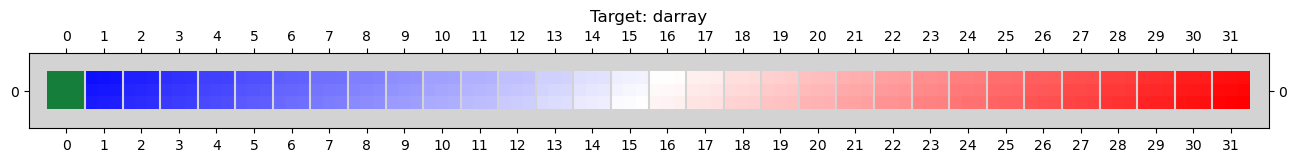

tensor='darray',
shape (1, 32, 1, 3, 3), reshaped to (1, 32, 3, 3), shown in (1, 32, 3, 3)
data distribution: mean -0.5, min -144.0, max 143.0
vmin -144.0 zero point 0.0 vmax 144.0 


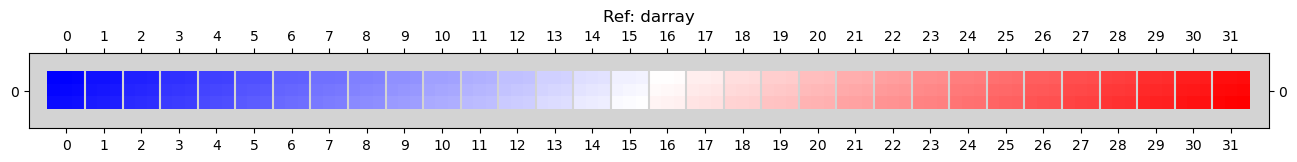

abs tol 1e-08, rel tol 0
tensor='darray',
Max of abs diff: neg -0.0024778781233978364, pos 0.002484468239639881, mean -6.185116484108688e-05
Abs of abs diff: min 3.449458851889631e-08, max 0.002484468239639881, mean 0.0013276753638997488
similarity: (0.9546507170829914, 0.6918525666630447, 10.247952316191395)
diffmin -0.01 diffmax 0.01


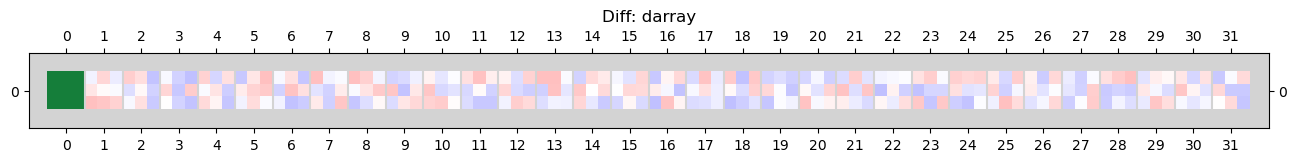

In [7]:
# a.plot_target( # plot the data distribution of target data
# a.plot_ref( # plot the data distribution of reference data
# a.plot_diff( # plot the difference of target and reference
a.plot_vs( # plot the previous three things
    abs_tol=1e-8, # default 1e-8; diff within tol will be treated as no difference. 
    rel_tol=0, # default 1e-3; either tolrence pass will be treated as pass; if assigned rel_tol, diff values are rescaled, not original value.
    diffmin=-0.01, diffmax=0.01, # min max value of diff plot color map. will be forced to symmetric.
    figsize=16, # the vertical size of generated figure, change it to make the figure clear. Horizontal size will be calculated automatically.
    c_columns=32, # channels on every row

    # tensor=None, # default; plot ALL the tensors. May cause OOM for large files, use with care
    tensor='darray', # tensor name, will be printed out before the figure. if np.darray, name is "darray". You can triple click the line printed out by .compare() or .info(), copy it and paste here for convinience.
    # tensor=['darray'], # plot a list of tensors

    # slices=(slice(0, 1), slice(2, 8)), # slice the ORIGINAL darray, passing slice object
    # slices=((0, 1), (2, 8)), # passing list or tuple of (end, ) or (start, end[, step])
    # slices=(0, 1), # just slice the given index, equal to slice(index, index+1)
    # slices=(0, -1), # -1 is equal to slice(None)
    # slices=(-1, None, -1, -1, -1), # use this trick to expand dim
    # slices=(-1, None, 64, slice(0, 2), (1, 2)), # you can use mixture of them

    # mix_axis=[1, 2], # for 5-or-more-dim data, merge the given dims so as to get a 4D (N, C, H, W) darray. if None, merge extra dims to C.

    # resize_hw="rectangle", # resize to nearest rectangle, no padding. If you encounter errors like "fig size too big", try this.
    # resize_hw="auto", # same to "rectangle"
    resize_hw="square", # resize to nearest square, with padding
    # resize_hw=(-1, -1), # same to "square"
    # resize_hw=(5, 2), # resize to specific shape, with padding
    # resize_hw=(-1, 4), # resize to specific shape, self calculate h, with padding
    # resize_hw=(4, -1), # resize to specific shape, self calculate w, with padding
    # resize_hw=None, # or
    # resize_hw="none", # do not resize (default)

    # index=(2, 0), # zoom in the index in the FIGURE, idx left(right) then top(bottom)
    # transpose_hw=True # transpose the data before resize_hw. The output figure shape will also be transposed if resize_hw is none or rectangle.

    # zero_point=0., # zero point of the data color map, default None, the mean of target and ref data
    # vmin=-1, vmax=1, # min max value of data color map, default None, the min and max of target and ref data. will be forced to symmetric.
    # dump=True, # whether do dump_vs after plot_vs (next cell)
    # verbose=True, # no use, pass to dump_vs if dump=True
)

In [8]:
# feature: dump_vs
a.dump_vs( # same arguments as plot_vs, but print the data instead of plotting. Indexes are corresponding. Use as a reference when plot is not clear.
#     abs_tol=0.001, # default 1e-8
#     rel_tol=0.01, # default 1e-3; either tolrence pass will be treated as pass; print "!" if not pass, the number of "!" is abs(diff) // (atol + rtol * abs(ref)), max to 100.
    c_columns=32, # channels on every row

#     tensor=None, # default; print ALL the tensors. May crash for large arrays, use with care
    tensor='darray', # tensor name, will be printed out before the print. if np.darray, name is "darray".
#     tensor=['darray'], # print a list of tensors

#     slices=(slice(0, 1), slice(2, 8)), # slice the ORIGINAL darray, passing slice object
#     slices=((0, 1), (2, 8)), # passing list or tuple of (end, ) or (start, end[, step])
#     slices=(0, 1), # just slice the given index, equal to slice(index, index+1)
#     slices=(0, -1), # -1 is equal to slice(None)
#     slices=(-1, None, -1, -1, -1), # use this trick to expand dim
#     slices=(-1, None, 64, slice(0, 2), (1, 2)), # you can use mixture of them

#     mix_axis=[1, 2], # for 5-or-more-d data, merge the given dims so as to get a 4D (N, C, H, W) darray. if None, merge extra dims to C.

#     resize_hw="rectangle", # resize to nearest rectangle, no padding.
#     resize_hw="auto", # same to "rectangle"
#     resize_hw="square", # resize to nearest square, with padding
#     resize_hw=(-1, -1), # same to "square"
#     resize_hw=(2, 3), # resize to specific shape, with padding
#     resize_hw=(-1, 3), # resize to specific shape, self calculate h, with padding
#     resize_hw=(3, -1), # resize to specific shape, self calculate w, with padding
#     resize_hw=None, # or
#     resize_hw="none", # do not resize (default)

    # index=(2, 0), # zoom in the index in the plot_vs figure, idx left(right) then top(bottom)
#     transpose_hw=True # transpose the data before resize_hw. The output shape will also be transposed if resize_hw is none or rectangle.

    # verbose=True # print all the indexes. If False, only print the indexes that do not pass the tolerance.
)

tensor='darray', # original shape (1, 32, 1, 3, 3), shape (1, 32, 1, 3, 3), reshaped to (1, 32, 3, 3), shown in (1, 32, 3, 3)
similarity: (0.954651, 0.691853, 10.247952), tolerance: abs 1e-08, rel 0.001
               index          target             ref            diff        rel_diff
        (0, 0, 0, 0)             nan      -144.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 1)             nan      -143.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 2)             nan      -142.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 1, 0)             nan      -141.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/chen/workspace/nnmoduletools/nnmoduletools/comparer/compare_visualizer.py:695: RuntimeWarning: divide by zero encountered in divide
  rel_diff = diff / np.abs(ref_darray)


In [9]:
# feature: dump_vs_plot
# when plot_vs is called, the arguments are cached and will be used by dump_vs_plot.
# you can override the arguments by passing them to dump_vs_plot.
a.dump_vs_plot()

tensor='darray', # original shape (1, 32, 1, 3, 3), shape (1, 32, 1, 3, 3), reshaped to (1, 32, 3, 3), shown in (1, 32, 3, 3)
similarity: (0.954651, 0.691853, 10.247952), tolerance: abs 1e-08, rel 0
               index          target             ref            diff        rel_diff
        (0, 0, 0, 0)             nan      -144.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 1)             nan      -143.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 0, 2)             nan      -142.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        (0, 0, 1, 0)             nan      -141.00000             nan             nan !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## Float Utils

In [10]:
from nnmoduletools import f32, f16, bf16

In [11]:
f32(np.pi), f16(np.pi), bf16(np.pi)

(floating[3.1415927(0x40490fdb)],
 float16[3.140625(0x4248)],
 bfloat16[3.140625(0x4049)])

In [12]:
f32(memory=0x40490fdb), f16(memory=0x4248), bf16(memory=0x4049)

(floating[3.1415927(0x40490fdb)],
 float16[3.140625(0x4248)],
 bfloat16[3.140625(0x4049)])

In [13]:
f16(10000) + f16(4)

float16[10000.0(0x70e2)]

In [14]:
f16([0.1, 0.2, 0.3]) + f16([0.4, 0.5, 0.6])

float16[0.5(0x3800), 0.7001953(0x399a), 0.9003906(0x3b34)]

In [15]:
f32(3.1415926).to(f16)

float16[3.140625(0x4248)]